<a href="https://colab.research.google.com/github/Alessandro5C/CA_TP_201913933_U201912400_U201913424/blob/master/TPQuoridor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#__Quoridor__

####Integrantes:
* Carhuancho Bazán Alessandro 
>U201913933
* Ingaroca Torres Andreluis
>U201913424
* Cruz Mamani Jack
>U201912400

#__Introducción__

Nuestro equipo de trabajo está en busca de una solución para el desarrollo del juego de Quoridor, basado en un enfoque de optimización de recursos, tanto en tiempo como espacio de memoria.

Este trabajo es fundamental para aplicar lo desarrollado en el curso de complejidad algorítmica. Como también, es base fundamental para una solución basada en Inteligencia Artificial.

Nuestra inspiración basa en analizar la complejidad y coste computacional de algoritmos para un eficiente desarrollo de software, proyectandonos en una visión a nuevas tecnologias, en lugar de una simple rutina de proceso.

##__Objetivos__

###__Del estudiante:__
   
*   __En Ingeniería de Software, el logro contribuye a alcanzar el: ABET – EAC - Student Outcome 4:__ La capacidad de reconocer responsabilidades éticas y profesionales en situaciones de ingeniería y hacer juicios informados, que deben considerar el impacto de las soluciones de ingeniería en contextos globales, económicos, ambientales y sociales.

*   __En Ciencias de la Computación, el logro contribuye a alcanzar el: ABET – CAC - Student Outcome 4:__ Reconocer las responsabilidades profesionales y tomar decisiones informadas sobre prácticas de computación basadas en principios legales y éticos.

###__Del trabajo:__
El presente trabajo tiene como objetivos:

*   Demostrar los conocimientos adquiridos dentro del curso y complementarlos a través de la investigación.

*   Analizar la complejidad de diferentes algoritmos y evaluar el consumo en espacio y en tiempo de dichos algoritmos.

*   Fortalecer las habilidades blandas, mejorando la comunicación y capacidad de trabajo en equipo de cada integrante del grupo.

##__Descripción del problema__

El Quoridor es un juego abstracto de estrategia donde pueden participar dos a cuatro personas, que sera desarrollado basado en los conocimientos adquiridos durante el ciclo en el curso mencionado en el lenguaje de programación de Python. En el presente trabajo se escalará el tamaño del tablero para que se pueda evaluar el coste computacional siguiendo las mismas reglas del juego original.

#__Estado del arte__

Los algoritmos que se usarán en el presente proyecto:
* Breadth First Search: Encuentra un árbol de expansión. Comienza de un vertice dado y explora todos los vertices vecinos antes de pasar a los siguientes vertice.
* Depth First Search: Encuentra un árbol de expansión en base a un vertice dado. Explora de forma recursiva cada nodo hasta llegar a un vertices que ya ha visitado o una hoja.
* Print Path: Devuelve el camino más corto entre dos vertices, si es que este existe.

#__Metodología__

Para representar la conexión entre los diferentes vertices, usaremos listas de adyacencia. Una lista de adyacencia ocupa mucho espacio en memoria en este caso debido a que

>$\Complejidad\Espacial$

>Lista de adyacencia ->
$O(V+E) = O(max(V, E))$

>Matriz de adyacencia ->
$O(V^2)$

>Para un tablero $N*N$, existen $V=N^2$ y $E=2N(N-1)$
>>Reemplazando
>>> $O(N^2+2N(N-1))<O((N^2)^2)$

>>> $O(N^2)<O(N^4)$

Para representar el tablero, tenemos 2 opciones:

* Usaremos nodos que representen los espacios donde el jugador puede estar, además,de aristas que representaran si dicho movimiento es válido.

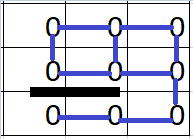

* Otra forma de representar seria a través de una matriz que represente mediante simbolos, las barreras y los espacios donde el jugador puede colocarse.

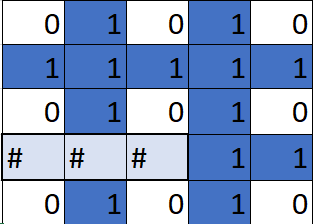

Para definir cual representación usar, se evaluará el comportamiento de dichas representaciones en tableros jugables de tamaño NxN donde N sea una potencia de 10 menos 1. El limite de tamaño con el que evaluaremos 10^3-1.